In [1]:
from shapely import Polygon
import numpy as np
import matplotlib.pyplot as plt
from helpers.descriptors import Section

In [2]:
ply = Polygon()

In [3]:
fp = "../../real_data/02_GrotteDeLaCascadeDeMotiers/process/sections_as_polylines/ThirdGallery_1_reordered_2d_088.txt"

In [4]:
sec = Section(np.loadtxt(fp), "ok", 0, from3d=False)

In [5]:
sec.compute_descriptors()
sec.fitEllipse()

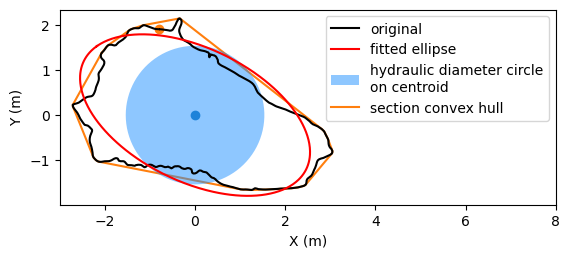

In [6]:
fig, ax = plt.subplots()

sec.plot_basic(ax, verbose=False)
ax.legend()
ax.set_xlim(-3, 8)
ax.scatter(sec.points2d[0,0], sec.points2d[0, 1])
plt.savefig("../../real_data/02_GrotteDeLaCascadeDeMotiers/outputs/basic_ellipse.png", dpi =300)

In [7]:
sec.print_basic_stats()

Basic stats for the chosen section
------------------------------------

Perimeter : 16.25m
Area : 12.49 m2
Hydraulic diameter :  3.07m
Solidity :  0.88
Circularity :  0.59

Mean distance to best fit ellipse :  0.22



In [8]:
thetai = np.arctan2(sec.points2d[:, 1], sec.points2d[:, 0])
shift = np.argmin(thetai)
print(shift)

293


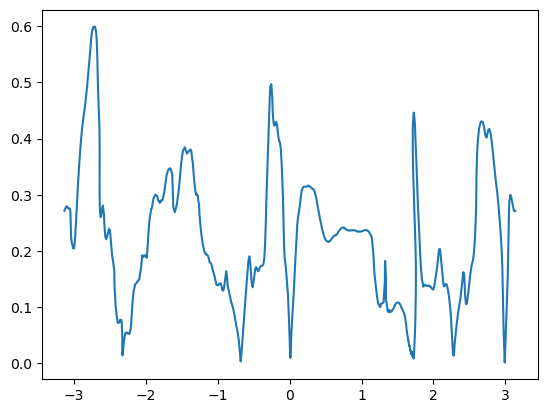

In [10]:
vectors = np.vstack([sec.dist_vectors[sec.dist_vectors_arguments[i], i] for i in range(len(sec.dist_vectors_arguments))])

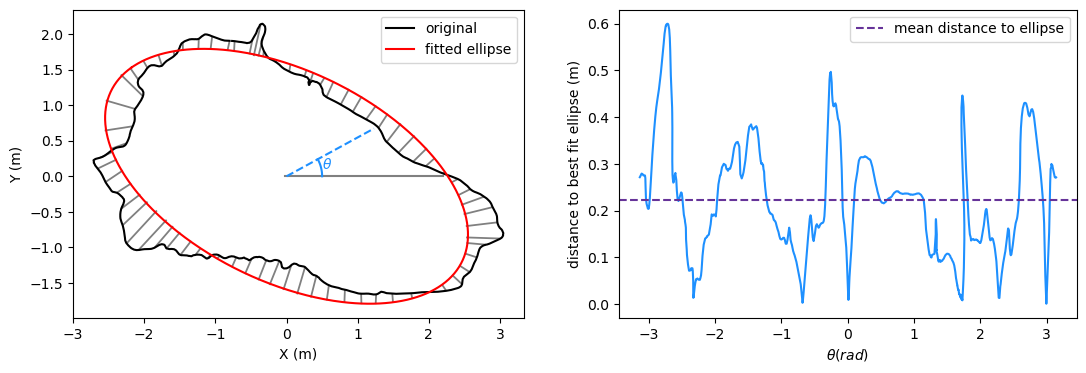

In [83]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize = (13, 4))
ax.plot(sec.points2d[:, 0], sec.points2d[:, 1], label = "original", color = "k")
ax.plot(sec.fitted_ellipse[:,0], sec.fitted_ellipse[:,1], label = "fitted ellipse", color = "r")
ax.quiver(sec.points2d[::20, 0], 
          sec.points2d[::20, 1], 
          vectors[::20,  0], 
          vectors[::20,  1], 
          width = 0.004, headlength = 0, 
          headwidth = 0, headaxislength= 0, scale = 6, color = "grey")

ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_aspect("equal")
ax.axhline(0, xmin=0.47, xmax=0.82, color = "grey")
ax.text(0.5, 0.1, "$\\theta$", color = "dodgerblue")
ax.plot((0, 1.4* np.cos(0.5)), (0, 1.4 * np.sin(0.5)), color = "dodgerblue", ls = "--")
xi = np.linspace(0, 0.5)
ax.plot(0.5* np.cos(xi), 0.5 * np.sin(xi), color = "dodgerblue")
ax2.plot(np.roll(thetai, -shift), np.roll(sec.dist_to_ellipse, -shift), color = "dodgerblue")
ax2.set_xlabel("$\\theta (rad)$")
ax2.set_ylabel("distance to best fit ellipse (m)")
ax2.axhline(sec.mean_dist_to_ellipse, color = "rebeccapurple", ls = "--", label = "mean distance to ellipse")

ax.legend()
ax2.legend()
plt.savefig("../../real_data/02_GrotteDeLaCascadeDeMotiers/outputs/best_fit_ellipse.png", dpi = 300)